# Tugas Akhir Data Mining

Memprediksi jumlah saham Apple yang akan terjual pada tahun selanjutnya, berdasarkan data dari tahun 2013 - 2019

# Import Library dan Import Dataset

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [85]:
dataset = pd.read_csv('AAPL_data.csv')
dataset

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


# Data Preparation

Membuang feature yang tidak dibutuhkan *'Name'*

In [86]:
dataset.drop('Name', axis = 1, inplace = True)

In [87]:
dataset

,date,open,high,low,close,volume
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838


In [88]:
dataset.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


Mencari data *'null'*

In [89]:
dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Mengubah tipe data feature *'date'* menjadi tipe data Datetime dan menjadikan *'date'* sebagai Index

In [90]:
dataset = dataset.set_index('date')
dataset.index= pd.to_datetime(dataset.index)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


# Visualisasi

Menampilkan grafik dari tiap data (open, close, high, low, volume)

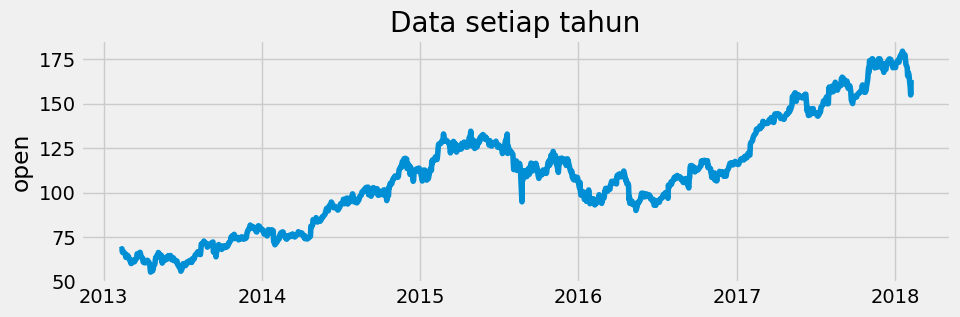

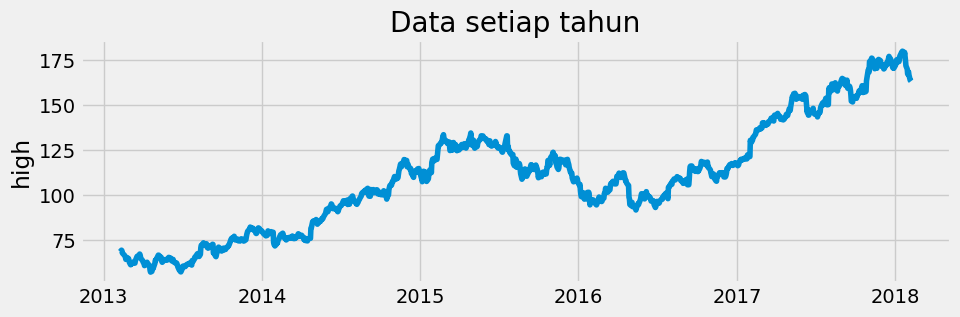

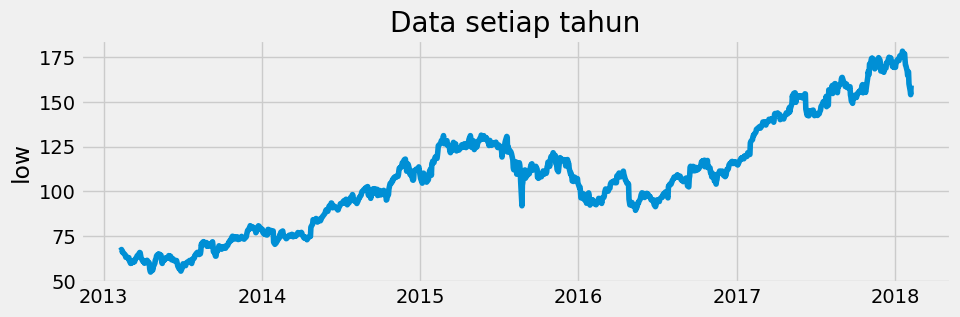

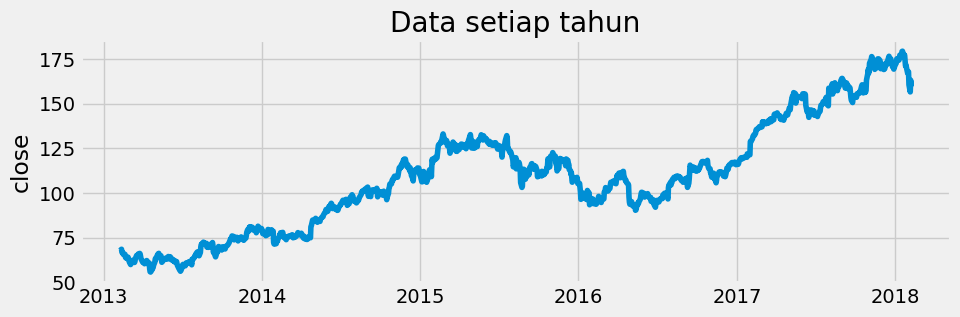

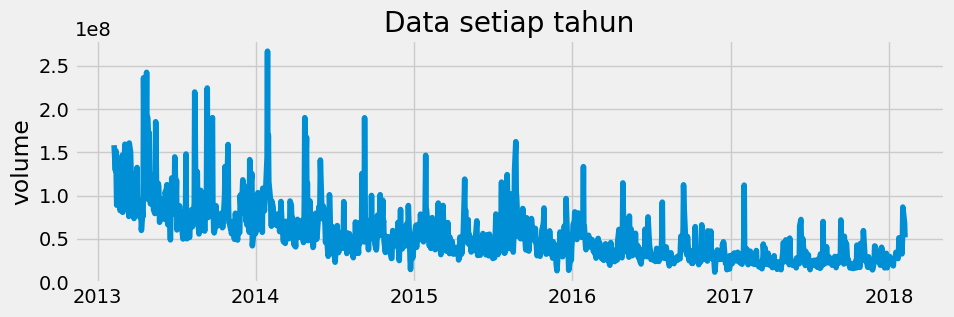

In [92]:
for i in (dataset):
  plt.figure(figsize=(10,3))
  plt.plot(dataset.index, dataset[i])
  plt.title('Data setiap tahun')
  plt.ylabel(i)
  plt.show

Membuat Feature Baru

In [93]:
dataset['quarter'] = dataset.index.quarter  # data tiap 3 bulan
dataset['month'] = dataset.index.month      # data perbulan
dataset['year'] = dataset.index.year        # data pertahun

In [94]:
dataset.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quarter', 'month', 'year'], dtype='object')

Menampilkan total tiap data dalam tahun

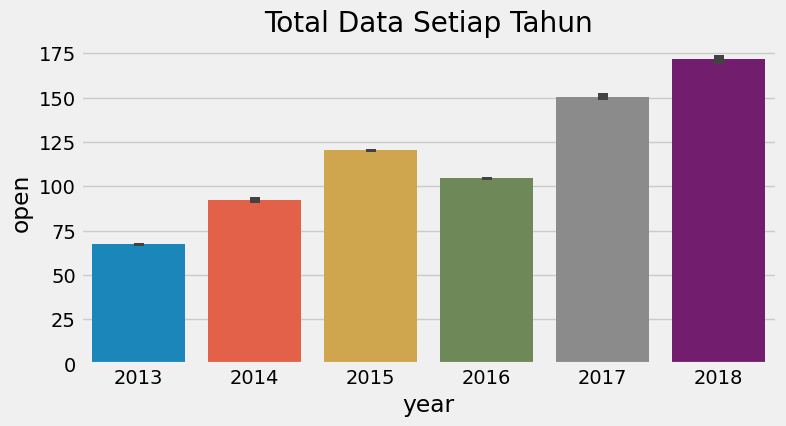

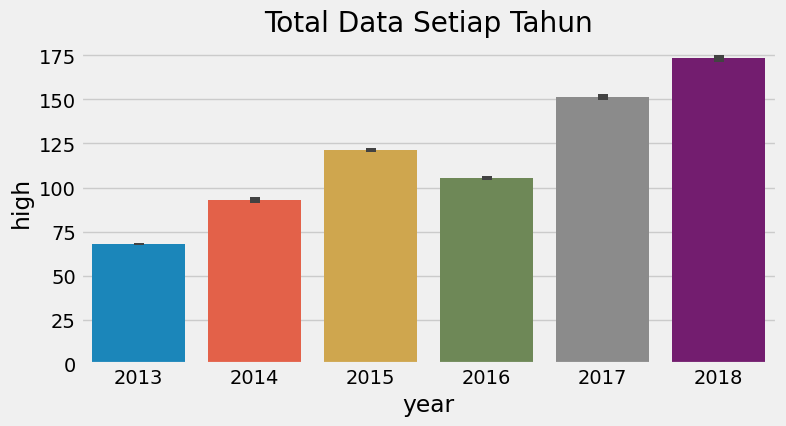

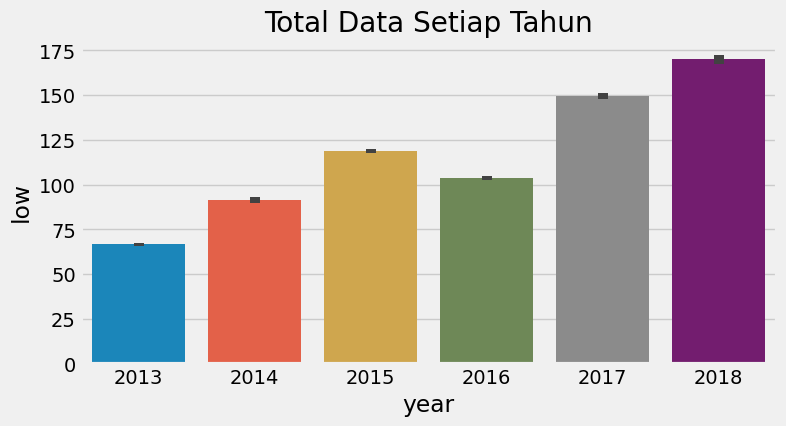

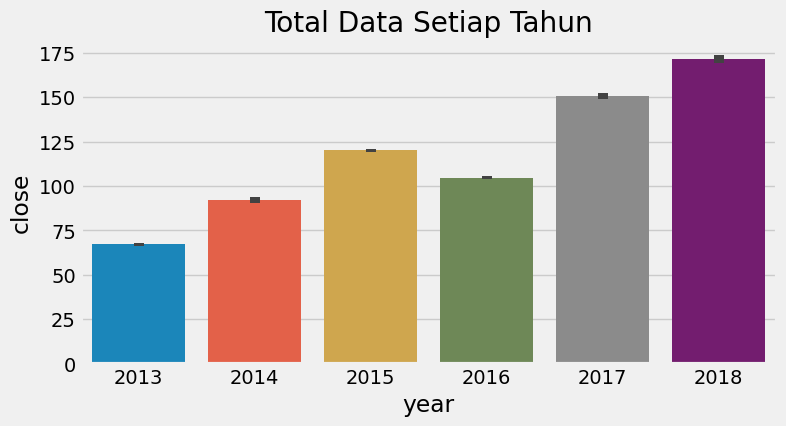

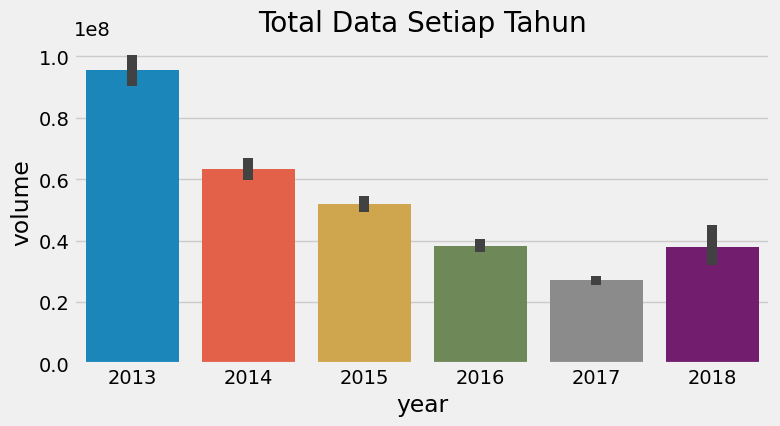

In [95]:
for i in (dataset.iloc[:,:-3]):
  fig , ax = plt.subplots(figsize=(8, 4))
  sns.barplot(data=dataset, x='year', y= dataset[i])
  plt.title('Total Data Setiap Tahun')
  plt.show()

Menampilkan total tiap data dalam 3 bulan

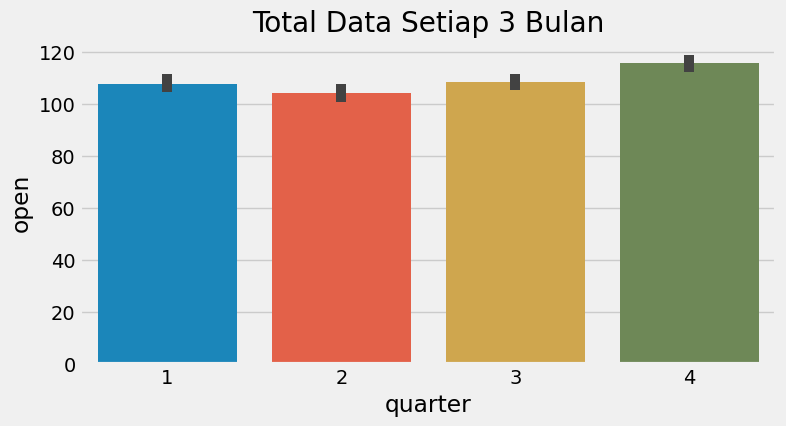

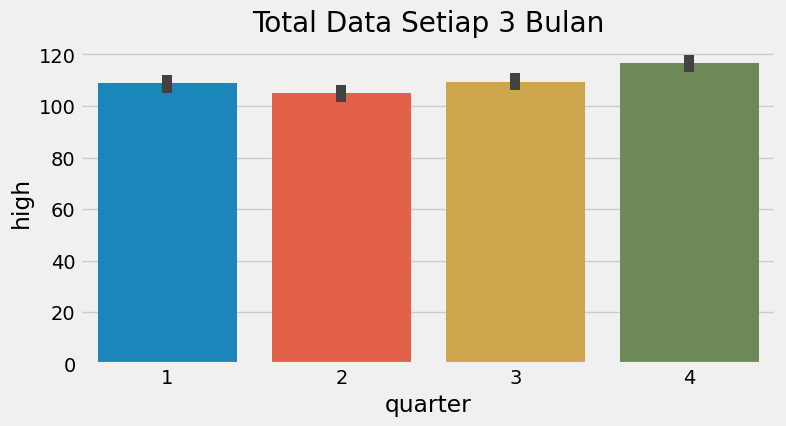

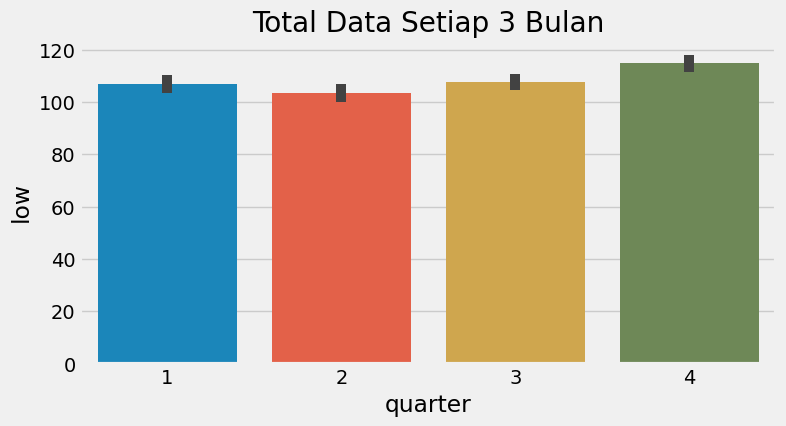

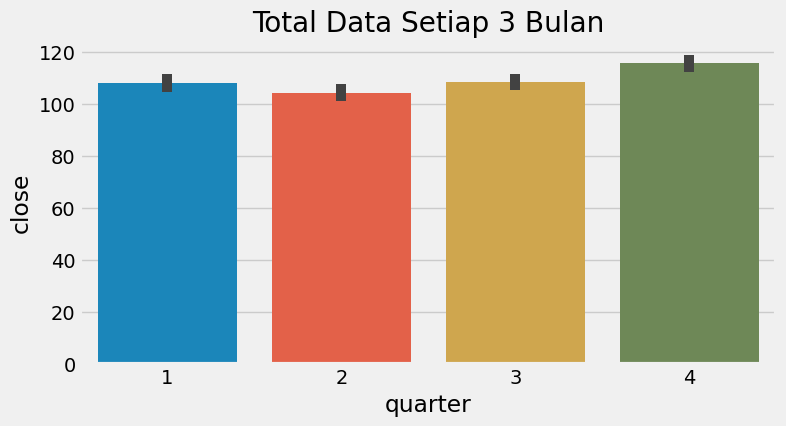

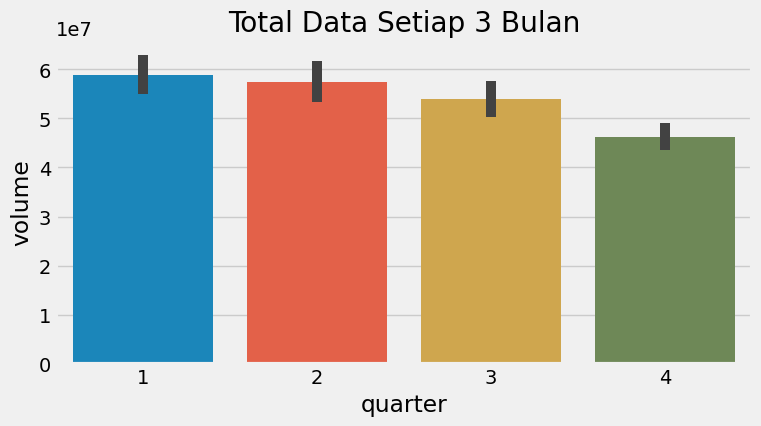

In [96]:
for i in (dataset.iloc[:,:-3]):
  fig , ax = plt.subplots(figsize=(8, 4))
  sns.barplot(data=dataset, x='quarter', y= dataset[i])
  plt.title('Total Data Setiap 3 Bulan')
  plt.show()

Menampilkan total tiap data dalam bulan

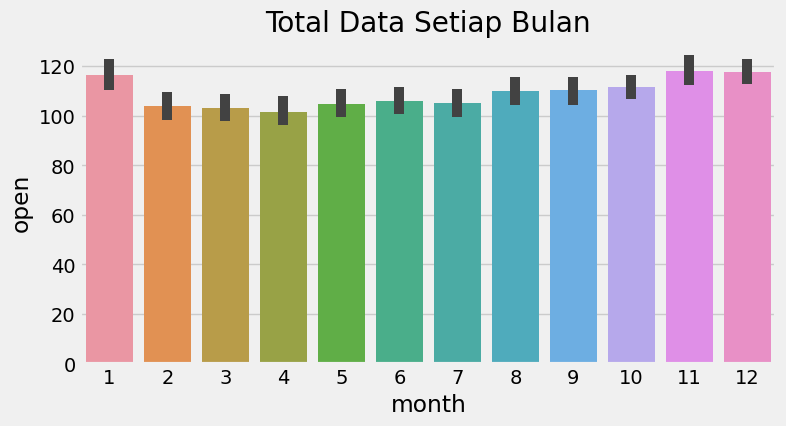

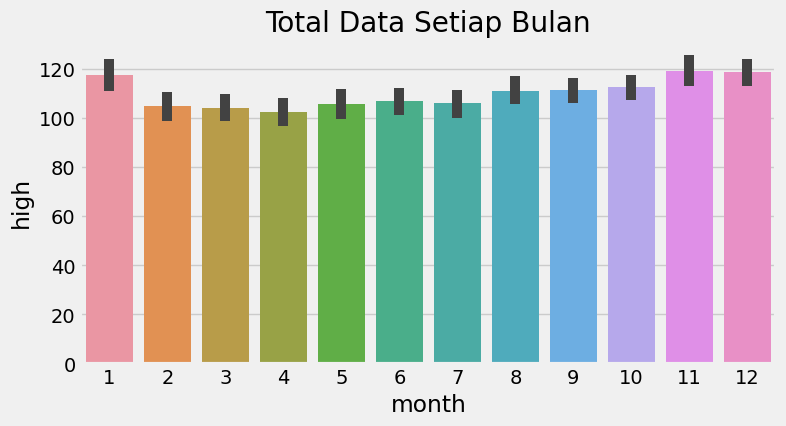

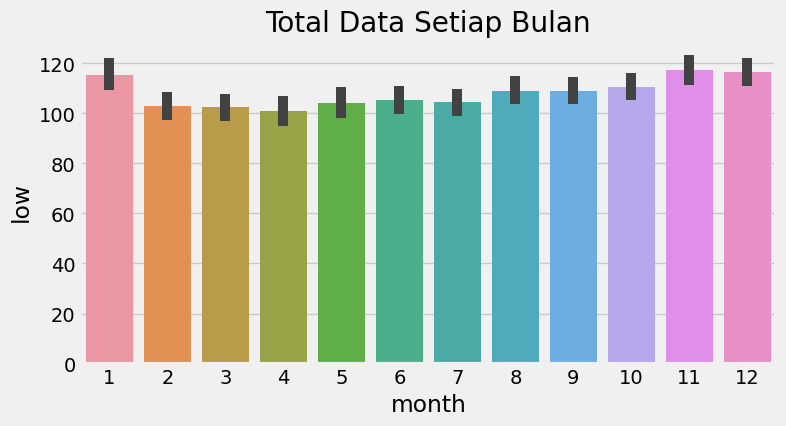

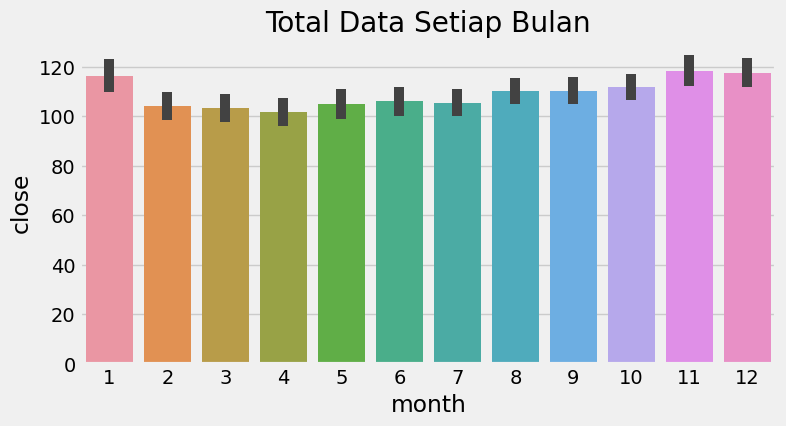

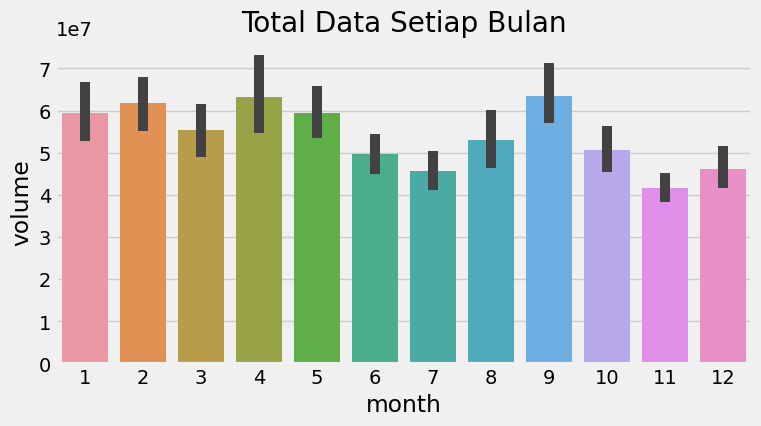

In [97]:
for i in (dataset.iloc[:,:-3]):
  fig , ax = plt.subplots(figsize=(8, 4))
  sns.barplot(data=dataset, x='month', y= dataset[i])
  plt.title('Total Data Setiap Bulan')
  plt.show()

# Training Dataset

In [98]:
feature = dataset.drop(columns = 'volume') #dataset.iloc[:, :-3]
feature.head(5)

,open,high,low,close,quarter,month,year
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,1,2,2013
2013-02-11,68.0714,69.2771,67.6071,68.5614,1,2,2013
2013-02-12,68.5014,68.9114,66.8205,66.8428,1,2,2013
2013-02-13,66.7442,67.6628,66.1742,66.7156,1,2,2013
2013-02-14,66.3599,67.3771,66.2885,66.6556,1,2,2013


In [99]:
target = dataset['volume']
target.head(5)

date
2013-02-08    158168416
2013-02-11    129029425
2013-02-12    151829363
2013-02-13    118721995
2013-02-14     88809154
Name: volume, dtype: int64

Membagi feature dan target menjadi data train dan data test, dengan test size 30%

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state=0)

Visuaslisai data pembagian training set dan test set

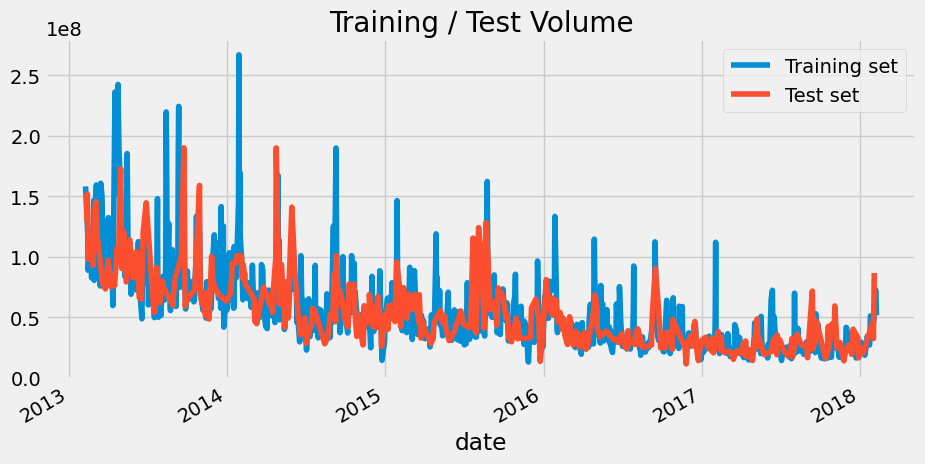

In [101]:
train = y_train.loc[y_train.index]
test = y_test.loc[y_test.index]

fig , ax = plt.subplots(figsize=(10, 5))
train.plot(ax= ax, label='Training dataset')
test.plot(ax=ax,label='Test dataset')
ax.legend(['Training set', 'Test set'])
plt.title('Training / Test Volume')
plt.show()

# Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(x_test)

Visualisai hasil prediksi menggunakan Algoritma Reggresi

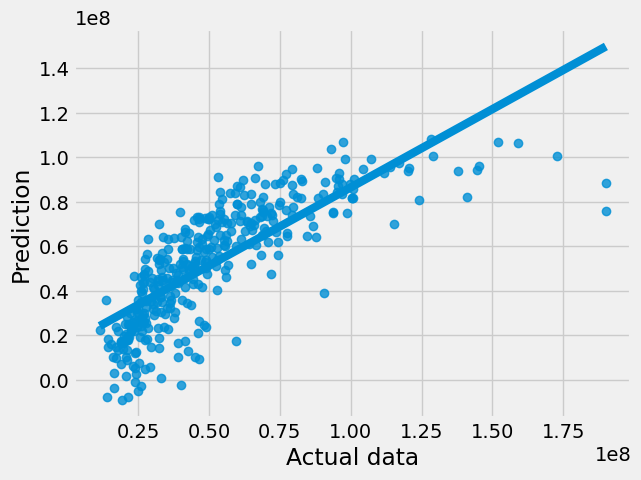

In [104]:
sns.regplot(x=y_test,y=y_pred, ci = None)
plt.xlabel('Actual data')
plt.ylabel('Prediction')
plt.show()

In [105]:
H1 = r2_score(y_test, y_pred)*100
rmse = sqrt(mean_squared_error(y_test, y_pred))

# XGBoost

In [106]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [107]:
y_bpred = reg.predict(x_test)

Menampilkan feature yang akan mempengaruhi hasil prediksi

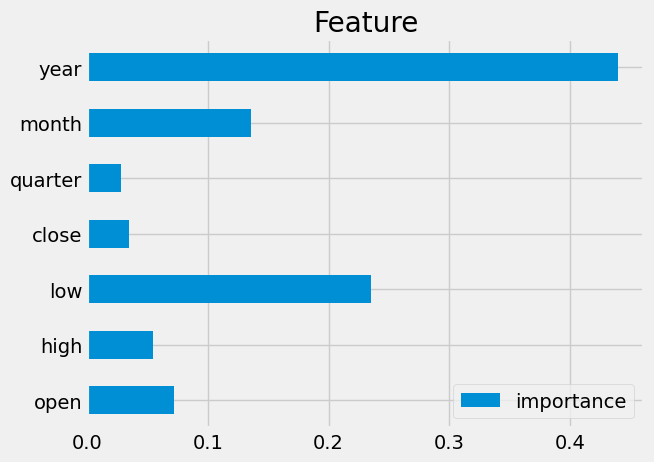

In [108]:
fi = pd.DataFrame(data = reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi.plot(kind='barh', title='Feature')
plt.show()

Visualisasi hasil prediksi menggunakan Algoritma XGBoost

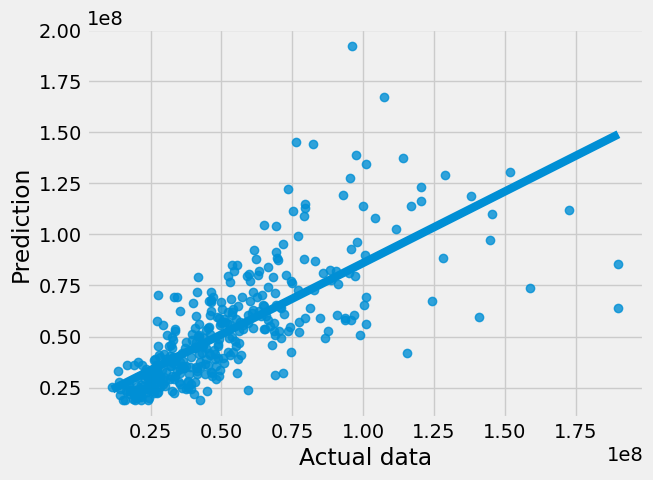

In [109]:
sns.regplot(x=y_test,y=y_bpred, ci = None)
plt.xlabel('Actual data')
plt.ylabel('Prediction')
plt.show()

In [110]:
H2 = r2_score(y_test, y_bpred)*100
rmse2 = sqrt(mean_squared_error(y_test, y_bpred))

#Evaluasi

In [113]:
print('Score Model Regresi \t: ', H1)
print('RMSE Regresi \t\t: ', rmse, '\n\n')

print('Score Model XGBoost \t: ', H2)
print('RMSE XGBoost \t\t: ', rmse2)

Score Model Regresi 	:  59.96390271011626
RMSE Regresi 		:  18908303.29578743 


Score Model XGBoost 	:  51.069635756595574
RMSE XGBoost 		:  20903351.154236097
